# Evaluating the risk-return performance of AAPL and MSFT in 2024

<h2 style="color:yellow;">---- 1. Data Acquisition ----</h2>

<h3 style="color:lightblue;">Identifying Data Source and Confirming Credibility:</h3>

* **Source**: Yahoo Finance (via automated web scrape using the `yfinance` Python library (unofficial Yahoo Finance interface)
* **Credibility**: Yahoo Finance aggregates public market data; widely used in financial analysis
* **Retrieval method**: `yfinacne` library using the `Ticker` and `history` methods
* **Scope**: Apple Inc. (`AAPL`) and Microsoft Corp. (`MSFT`), one-year period (2024)
* **Verification**: Confirmed 
* **Storage**: Raw DataFrame exported unchanged as `raw_data/aapl_raw.csv` and `raw_data/msft_raw.csv` before cleaning

<h3 style="color:lightblue;">Importing Libraries</h3>

All Python libraries used. Individual functions imported to avoid clutter and minimise load time.

In [50]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

pd.set_option("display.float_format", "{:,.2f}".format)


<h3 style="color:lightblue;">Importing Tickers Using yfinance</h3>

##### `AAPL`

In [51]:
aapl = yf.Ticker("AAPL")
aapl_df = yf.download(tickers="AAPL", start="2024-01-01", end="2024-12-31", auto_adjust=True)
aapl_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


##### `MSFT`

In [52]:
msft = yf.Ticker("MSFT")
msft_df = yf.download(tickers="MSFT", start="2024-01-01", end="2024-12-31", auto_adjust=True)
msft_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


<h2 style="color:yellow;">---- 2. Data Inspection ----</h2>

<h3 style="color:lightblue">Shape Summaries</h3>

##### `AAPL`

In [53]:
print("Shape summary:")
print(f" - Length = {aapl_df.shape[0]} rows")
print(f" - Width = {aapl_df.shape[1]} columns")

Shape summary:
 - Length = 251 rows
 - Width = 5 columns


##### `MSFT`

In [54]:
print("Shape summary:")
print(f" - Length = {msft_df.shape[0]} rows")
print(f" - Width = {msft_df.shape[1]} columns")

Shape summary:
 - Length = 251 rows
 - Width = 5 columns


<h3 style="color:lightblue;">Column Summaries</h3>

##### `AAPL`

In [55]:
print("Column summary:")
aapl_df_columns = list(aapl_df.columns.values)
print(f" - Column names: {aapl_df_columns}")
print(" - Column types:")
for col, types in aapl_df.dtypes.items():
    print(f"    {col} = {types}")

Column summary:
 - Column names: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
 - Column types:
    ('Close', 'AAPL') = float64
    ('High', 'AAPL') = float64
    ('Low', 'AAPL') = float64
    ('Open', 'AAPL') = float64
    ('Volume', 'AAPL') = int64


##### `MSFT`

In [56]:
print("Column summary:")
msft_df_columns = list(msft_df.columns.values)
print(f" - Column names: {msft_df_columns}")
print(" - Column types:")
for col, types in msft_df.dtypes.items():
    print(f"    {col} = {types}")

Column summary:
 - Column names: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT')]
 - Column types:
    ('Close', 'MSFT') = float64
    ('High', 'MSFT') = float64
    ('Low', 'MSFT') = float64
    ('Open', 'MSFT') = float64
    ('Volume', 'MSFT') = int64


<h3 style="color:lightblue;">Missing Values</h3>

(All columns return 0 missing values for each dataframe `aapl_df` and `msft_df`)

##### `AAPL`

In [57]:
print("Missing values per column:")
print(aapl_df.isnull().sum())

Missing values per column:
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


##### `MSFT`

In [58]:
print("Missing values per column:")
print(msft_df.isnull().sum())

Missing values per column:
Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


<h3 style="color:lightblue;">Statistical Analysis</h3>

##### `AAPL`

In [59]:
display(Markdown("###  MSFT STDev"))
display(round(aapl_df.std(axis="rows"),2))
display(Markdown("### Min:"))
display(round(aapl_df.min(axis="rows"),2))
display(Markdown("### Max:"))
display(round(aapl_df.max(axis="rows"),2))
display(Markdown("### Mean:"))
display(round(aapl_df.mean(axis="rows"),2))



###  MSFT STDev

Price   Ticker
Close   AAPL             25.53
High    AAPL             25.60
Low     AAPL             25.15
Open    AAPL             25.34
Volume  AAPL     30,764,411.81
dtype: float64

### Min:

Price   Ticker
Close   AAPL            163.82
High    AAPL            165.21
Low     AAPL            162.91
Open    AAPL            164.17
Volume  AAPL     23,234,700.00
dtype: float64

### Max:

Price   Ticker
Close   AAPL             258.10
High    AAPL             259.18
Low     AAPL             256.72
Open    AAPL             257.28
Volume  AAPL     318,679,900.00
dtype: float64

### Mean:

Price   Ticker
Close   AAPL            205.87
High    AAPL            207.56
Low     AAPL            203.88
Open    AAPL            205.60
Volume  AAPL     57,177,003.19
dtype: float64

##### `MSFT`

In [60]:
display(Markdown("###  MSFT STDev"))
display(round(msft_df.std(axis="rows"),2))
display(Markdown("### Min:"))
display(round(msft_df.min(axis="rows"),2))
display(Markdown("### Max:"))
display(round(msft_df.max(axis="rows"),2))
display(Markdown("### Mean:"))
display(round(msft_df.mean(axis="rows"),2))



###  MSFT STDev

Price   Ticker
Close   MSFT            18.10
High    MSFT            18.02
Low     MSFT            17.99
Open    MSFT            18.02
Volume  MSFT     7,389,197.82
dtype: float64

### Min:

Price   Ticker
Close   MSFT           363.03
High    MSFT           367.28
Low     MSFT           361.79
Open    MSFT           364.23
Volume  MSFT     7,164,500.00
dtype: float64

### Max:

Price   Ticker
Close   MSFT            463.24
High    MSFT            464.02
Low     MSFT            460.17
Open    MSFT            462.69
Volume  MSFT     64,263,700.00
dtype: float64

### Mean:

Price   Ticker
Close   MSFT            416.45
High    MSFT            419.73
Low     MSFT            412.85
Open    MSFT            416.50
Volume  MSFT     20,615,866.53
dtype: float64

<h3 style="color:lightblue;">First/Last 5 Entries</h3>

##### `AAPL`

In [61]:
display(Markdown("### First 5 entries:"))
display(aapl_df.head())
display(Markdown("### Last 5 entries:"))
display(aapl_df.tail())

### First 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


### Last 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.37,254.75,252.55,253.87,40858800
2024-12-24,257.29,257.30,254.39,254.59,23234700
2024-12-26,258.10,259.18,256.72,257.28,27237100
2024-12-27,254.69,257.78,252.16,256.92,42355300
2024-12-30,251.31,252.60,249.86,251.34,35557500


##### `MSFT`

In [62]:
display(Markdown("### First 5 entries:"))
display(msft_df.head())
display(Markdown("### Last 5 entries:"))
display(msft_df.tail())

### First 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


### Last 5 entries:

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-12-23,432.87,435.26,430.46,434.35,19152500
2024-12-24,436.93,437.20,431.82,432.27,7164500
2024-12-26,435.72,438.53,434.24,436.68,8194200
2024-12-27,428.18,432.84,424.02,432.22,18117700
2024-12-30,422.51,425.21,419.59,423.73,13158700


<h3 style="color:lightblue;">Duplicate Entries</h3>

##### `AAPL`

In [63]:
display(Markdown(f"Number of duplicated rows: `{int(aapl_df.duplicated().sum())}`"))

Number of duplicated rows: `0`

##### `MSFT`

In [64]:
display(Markdown(f"Number of duplicated rows: `{int(msft_df.duplicated().sum())}`"))

Number of duplicated rows: `0`

<h3 style="color:lightblue;">Chronological Order Check</h3>

##### `AAPL`

In [65]:
# Checking index type
display(Markdown(f"Index type: `{type(aapl_df.index).__name__}`"))

Index type: `DatetimeIndex`

In [66]:
# Checking chronological order
chronological_order = aapl_df.index.is_monotonic_increasing
display(Markdown(f"AAPL dates are chronological: `{chronological_order}`"))

AAPL dates are chronological: `True`

##### `MSFT`

In [67]:
# Checking index type
display(Markdown(f"Index type: `{type(msft_df.index).__name__}`"))

Index type: `DatetimeIndex`

In [68]:
# Checking chronological order
chronological_order = msft_df.index.is_monotonic_increasing
display(Markdown(f"MSFT dates are chronological: `{chronological_order}`"))

MSFT dates are chronological: `True`

<h2 style="color:yellow;">---- 3. Data Cleaning ----</h2>

<h3 style="color:lightblue;">Formatting Missing Values</h3>

N/A for both `AAPL` and `MSFT` dataframes - no missing values as confirmed above

<h3 style="color:lightblue;">Range and Logic Validation</h3>

##### `AAPL`

In [69]:
aapl_df_valid = (aapl_df["Low"] <= aapl_df["Open"]) & (aapl_df["Open"] <= aapl_df["High"])
print(aapl_df_valid.all())

Ticker
AAPL    True
dtype: bool


##### `MSFT`

In [70]:
msft_df_valid = (msft_df["Low"] <= msft_df["Open"]) & (msft_df["Open"] <= msft_df["High"])
print(msft_df_valid.all())

Ticker
MSFT    True
dtype: bool


<h3 style="color:lightblue;">Format Standardistation</h3>

##### `AAPL`

In [71]:
display(yf.Ticker("AAPL").history(start="2024-01-01", end="2024-01-09"), aapl_df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,185.58,186.86,182.35,184.08,82488700,0.00,0.00
2024-01-03 00:00:00-05:00,182.67,184.32,181.89,182.70,58414500,0.00,0.00
2024-01-04 00:00:00-05:00,180.62,181.55,179.36,180.38,71983600,0.00,0.00
2024-01-05 00:00:00-05:00,180.46,181.23,178.66,179.66,62379700,0.00,0.00
2024-01-08 00:00:00-05:00,180.56,184.04,179.98,184.00,59144500,0.00,0.00


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.08,186.86,182.35,185.58,82488700
2024-01-03,182.70,184.32,181.89,182.67,58414500
2024-01-04,180.38,181.55,179.36,180.62,71983600
2024-01-05,179.66,181.23,178.66,180.46,62379700
2024-01-08,184.00,184.04,179.98,180.56,59144500


##### `MSFT`

In [72]:
display(yf.Ticker("MSFT").history(start="2024-01-01", end="2024-01-09"), msft_df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,369.06,371.07,362.06,366.11,25258600,0.00,0.00
2024-01-03 00:00:00-05:00,364.27,368.46,363.78,365.84,23083500,0.00,0.00
2024-01-04 00:00:00-05:00,365.91,368.31,362.45,363.21,20901500,0.00,0.00
2024-01-05 00:00:00-05:00,364.23,367.28,361.79,363.03,21004600,0.00,0.00
2024-01-08 00:00:00-05:00,364.56,370.38,364.27,369.88,23134000,0.00,0.00


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,366.11,371.07,362.06,369.06,25258600
2024-01-03,365.84,368.46,363.78,364.27,23083500
2024-01-04,363.21,368.31,362.45,365.91,20901500
2024-01-05,363.03,367.28,361.79,364.23,21004600
2024-01-08,369.88,370.38,364.27,364.56,23134000


<h3 style="color:lightblue;">Outlier Inspection</h3>

Visual inspection of outliers for each column: Low, High, Open, Close and Volume.

##### `AAPL`

<Axes: title={'center': 'AAPL Daily Price Summary'}, xlabel='Date'>

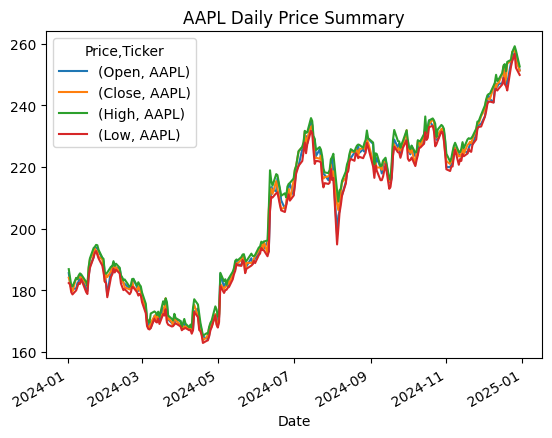

In [73]:
aapl_df.plot(y=["Open","Close","High", "Low"], title="AAPL Daily Price Summary")


##### `MSFT`

<Axes: title={'center': 'MSFT Daily Price Summary'}, xlabel='Date'>

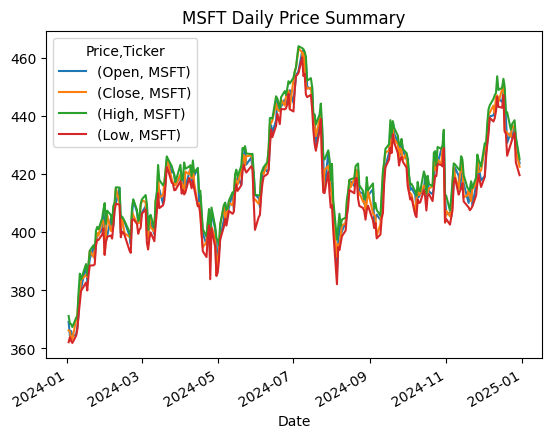

In [74]:
msft_df.plot(y=["Open","Close","High", "Low"], title="MSFT Daily Price Summary")

##### Combined volume check (`AAPL` and `MSFT`)

* Combining volume checks allows for easeier visual inspection of outliers as common spikes indicate general market behvaiour. 
* Independent spikes are checked against Yahoo Finance and MarketWatch

Ticker,AAPL,MSFT
Date,,
2024-01-02,82488700,25258600
2024-01-03,58414500,23083500
2024-01-04,71983600,20901500
2024-01-05,62379700,21004600
2024-01-08,59144500,23134000


<Axes: title={'center': 'AAPL and MSFT Ticker Volume'}, xlabel='Date'>

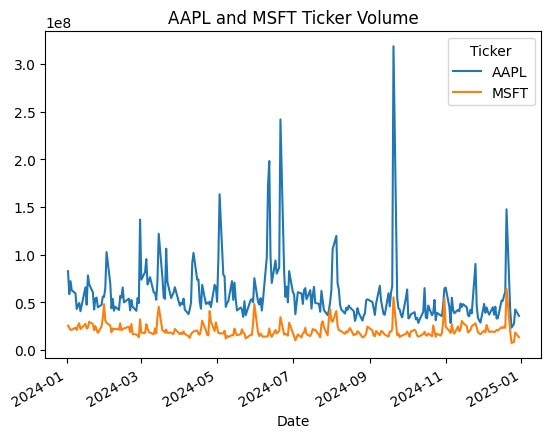

In [75]:
combined_vol = pd.concat([aapl_df["Volume"], msft_df["Volume"]], axis=1)
display(combined_vol.head(), combined_vol.plot(y=["AAPL", "MSFT"], title="AAPL and MSFT Ticker Volume"))

<h2 style="color:yellow;">---- 4. Data Transformation ----</h2>

##### `AAPL`

In [76]:
aapl_tr = pd.DataFrame({
    "Range": aapl_df[("High", "AAPL")] - aapl_df[("Low", "AAPL")],
    "Return": aapl_df[("Close", "AAPL")] - aapl_df[("Open", "AAPL")]
})


In [77]:
aapl_tr.head()

,Range,Return
Date,,
2024-01-02,4.51,-1.50
2024-01-03,2.43,0.03
2024-01-04,2.19,-0.24
2024-01-05,2.57,-0.80
2024-01-08,4.07,3.44


<Axes: title={'center': 'Daily Range and Returns for AAPL'}, xlabel='Date'>

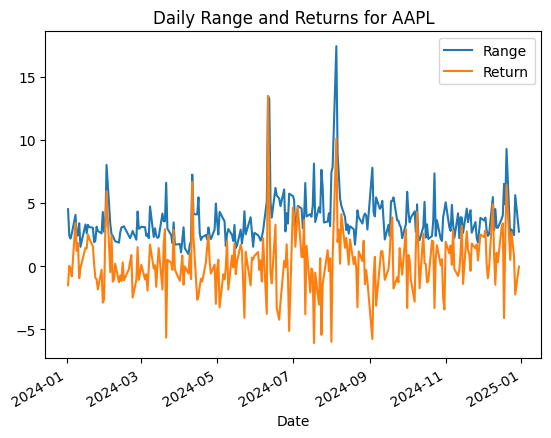

In [78]:
aapl_tr.plot(y=["Range", "Return"], title="Daily Range and Returns for AAPL")

#### Range

In [79]:
range_daily_df = pd.DataFrame({
    "MSFT": msft_df[("High", "MSFT")] - msft_df[("Low", "MSFT")],
    "AAPL": aapl_df[("High", "AAPL")] - aapl_df[("Low", "AAPL")]
})


In [80]:
range_daily_df.head()

,MSFT,AAPL
Date,,
2024-01-02,9.01,4.51
2024-01-03,4.69,2.43
2024-01-04,5.85,2.19
2024-01-05,5.49,2.57
2024-01-08,6.11,4.07


<Axes: title={'center': 'Daily Range'}, xlabel='Date'>

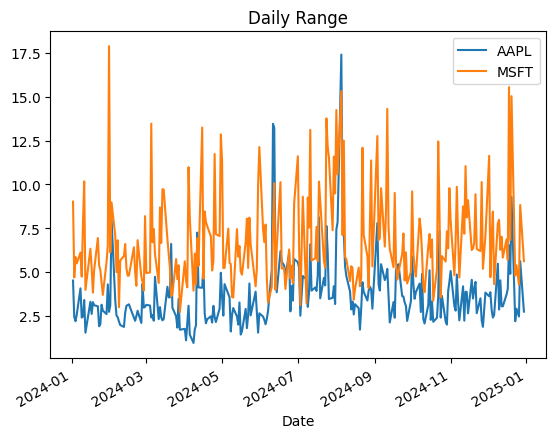

In [81]:
range_daily_df.plot(y=["AAPL","MSFT"], title="Daily Range")

#### Returns

In [82]:
return_daily_df = pd.DataFrame({
    "MSFT": msft_df[("Close", "MSFT")] - msft_df[("Open", "MSFT")],
    "AAPL": aapl_df[("Close", "AAPL")] - aapl_df[("Open", "AAPL")]
})

In [83]:
return_daily_df.head()

,MSFT,AAPL
Date,,
2024-01-02,-2.95,-1.50
2024-01-03,1.57,0.03
2024-01-04,-2.69,-0.24
2024-01-05,-1.20,-0.80
2024-01-08,5.32,3.44


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

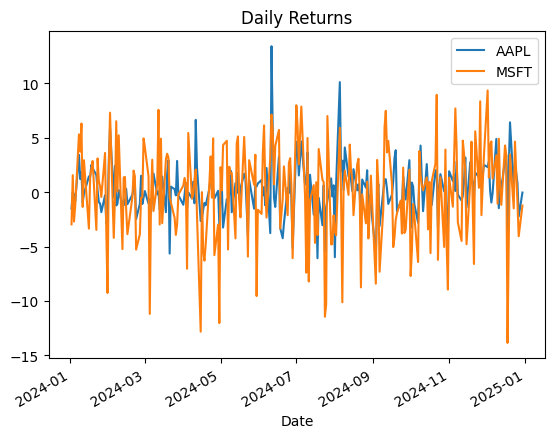

In [84]:
return_daily_df.plot(y=["AAPL","MSFT"], title="Daily Returns")